In [14]:
import pandas as pd
import numpy as np
import os
import csv
import glob
import matplotlib.pyplot as plt
%matplotlib notebook
import re
import plotly.express as px
from scipy.stats import linregress


pd.options.display.float_format = '{:.2f}'.format

In [2]:
merged_df = pd.read_csv('Housing_data_clean_merged.csv')
merged_df.head()

,State,CountyName,Housing Type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NY,New York County,Data_1_bed,524230.33,572724.58,577255.17,601978.33,652846.00,692174.33,707325.42,736360.25,731432.75,702898.83,685897.33
1,IL,Cook County,Data_1_bed,211172.75,192259.83,178664.08,188592.92,204526.83,205508.17,209737.25,216489.17,220843.92,217292.50,219304.00
2,NY,New York County,Data_1_bed,623403.75,653817.67,661195.17,712712.50,808760.17,845258.83,855036.17,845226.42,823293.50,788139.58,765217.33
3,IL,Cook County,Data_1_bed,234486.42,219276.25,207400.75,219404.67,231354.75,236109.92,241497.33,248256.42,251728.92,249244.58,247461.33
4,TX,Harris County,Data_1_bed,95503.25,87770.00,80351.83,86292.58,97141.00,109236.25,117556.75,120752.42,128352.42,134669.08,140585.33


In [3]:
years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
top_ten = ["TX","KY","MO","OK","IA","TN","VA","SD","MN","KS"]
bot_ten = ["AZ","MS","HI","DE","VT","DC","AZ","MI","GA","NV"]

In [8]:
state_df_10 = pd.DataFrame(merged_df.groupby("State")[years].mean())
state_df_10.head(7)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,
AK,231445.06,228717.82,231169.96,236093.23,241064.58,247966.00,252271.47,253235.34,255738.71,266552.22,274801.00
AL,155498.91,149301.99,147113.69,148191.85,150574.62,153680.91,156818.24,161698.78,168549.34,175482.06,183986.25
AR,123173.78,121320.69,122172.10,124257.33,125861.48,128572.22,131986.37,136485.41,141353.16,146848.06,152091.51
AZ,184334.03,166374.93,174706.83,198547.77,212104.17,220482.14,231891.25,244551.37,261395.80,275844.31,299263.13
CA,405468.51,384065.70,387856.35,451519.65,502475.13,539876.50,580710.54,622375.12,678231.93,688833.82,721214.60
CO,264003.73,253901.17,257041.12,273263.99,293601.68,319819.30,346463.94,371276.15,398067.77,415672.73,430641.06
CT,317108.41,302346.70,287283.36,293665.57,297951.43,297853.44,298206.95,302844.51,306610.46,307229.56,316352.65


In [9]:
state_trans = pd.DataFrame(state_df_10.transpose())
state_trans = state_trans.reset_index()
state_trans["index"] = pd.to_numeric(state_trans['index'])
state_trans.columns

Index(['index', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='State')

In [10]:
state_trans["Average"] = state_trans.mean(axis=1)
state_trans.columns

Index(['index', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY', 'Average'],
      dtype='object', name='State')

In [26]:
years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
top_ten = ["TX","KY","MO","OK","IA","TN","VA","SD","MN","KS"]
bot_ten = ["AZ","MS","HI","DE","VT","DC","AZ","MI","GA","NV"]

<IPython.core.display.Javascript object>


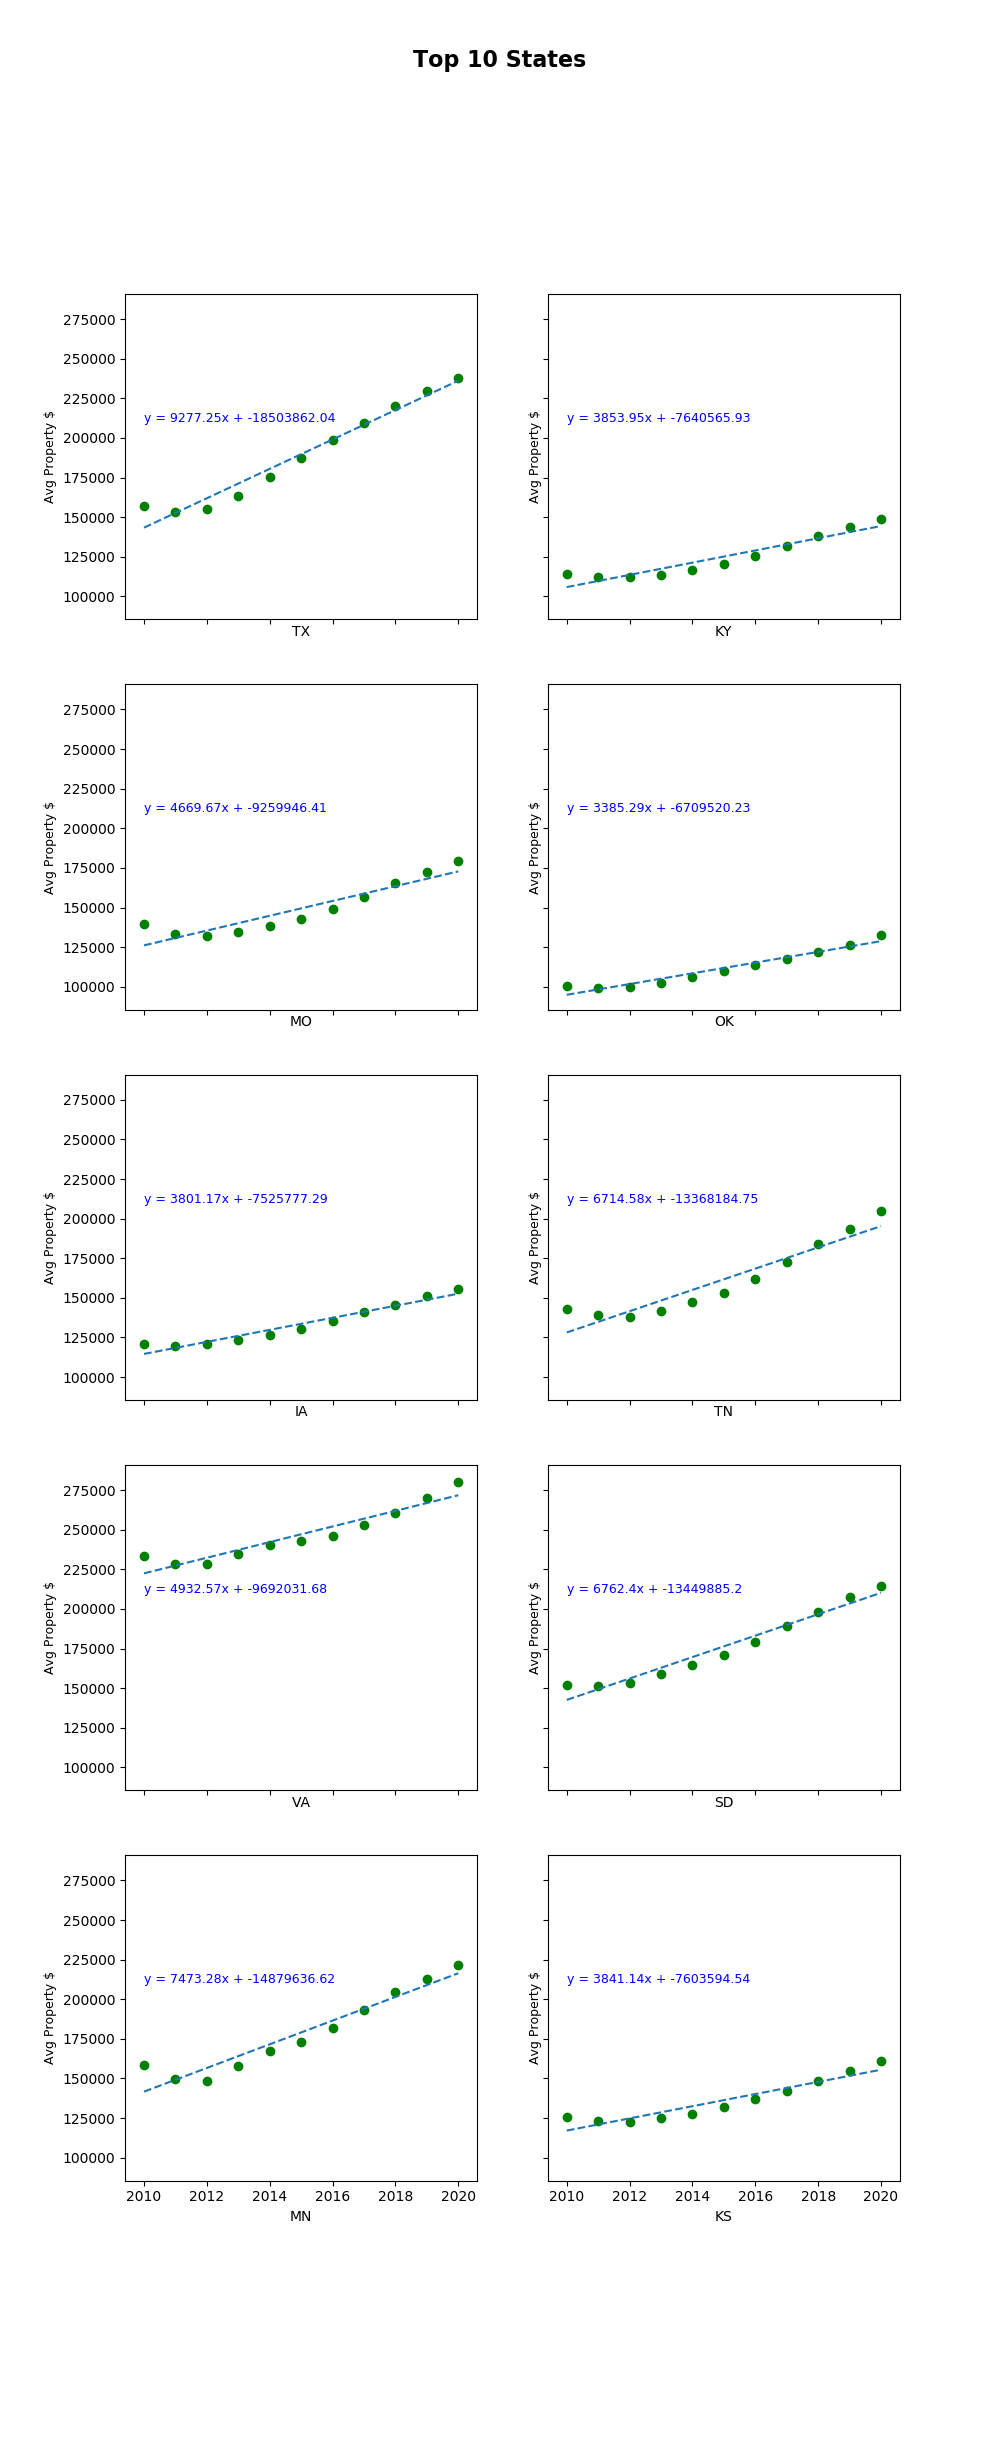

/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [27]:
# start for loop

fig, ax = plt.subplots(5,2, figsize=(10,24.5), sharex=True, sharey=True)
fig.suptitle("Top 10 States", fontsize=16, fontweight="bold")

ax = ax.ravel()
for ind in range(len(top_ten)):
    state = top_ten[ind]
    x_values = state_trans["index"]
    y_values = state_trans[state]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax[ind].scatter(x_values,y_values,color="green")
    ax[ind].plot(x_values,regress_values,"--")
    ax[ind].annotate(line_eq,(2010,210000),fontsize=9,color="blue")
    ax[ind].set_ylabel("Avg Property $",fontsize=9)
    ax[ind].set_xlabel(state)

plt.show()
    # 

<IPython.core.display.Javascript object>


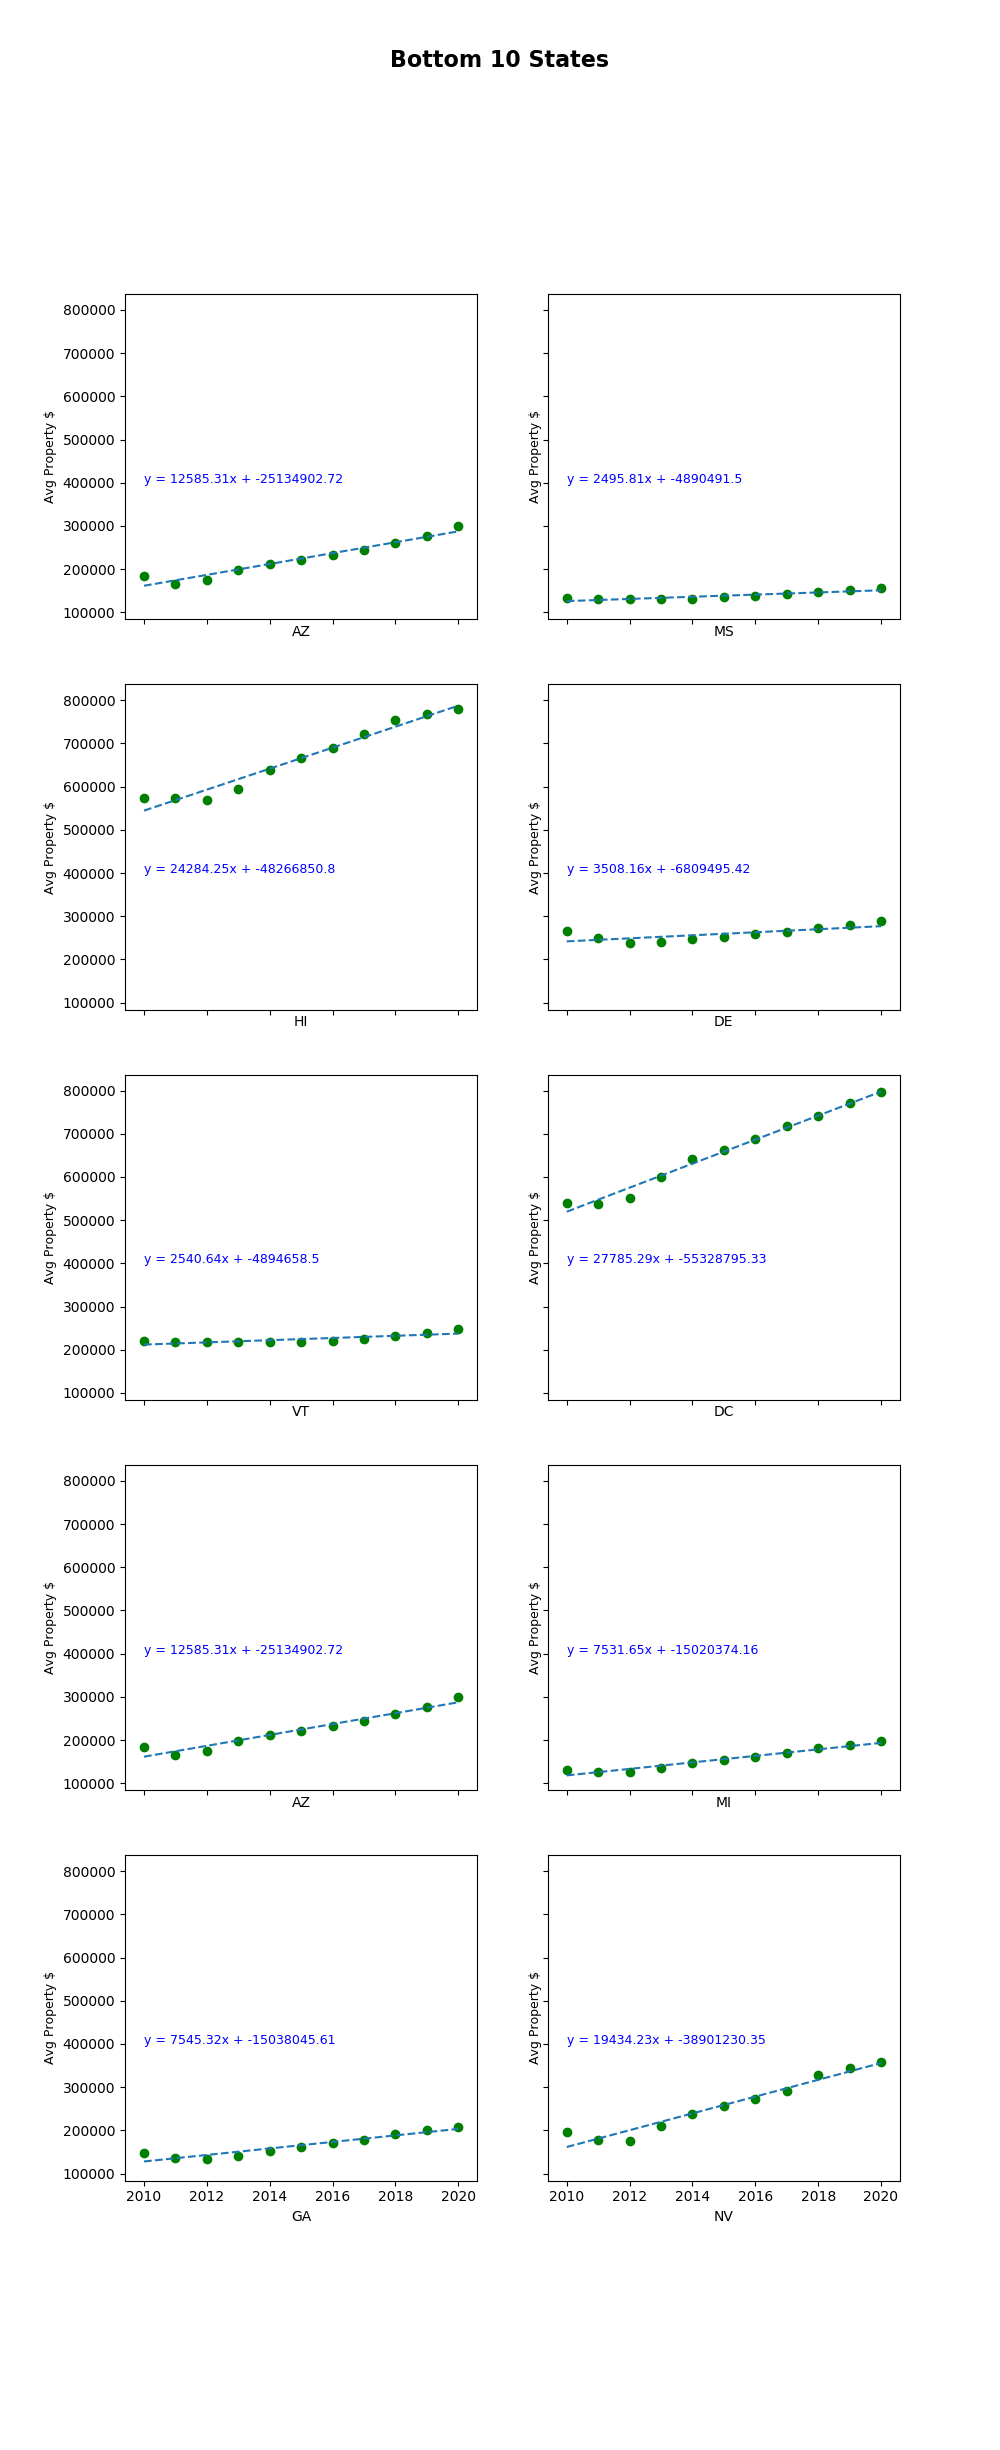

/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [29]:
fig, ax = plt.subplots(5,2, figsize=(10,24.5), sharex=True, sharey=True)
fig.suptitle("Bottom 10 States", fontsize=16, fontweight="bold")

ax = ax.ravel()
for ind in range(len(top_ten)):
    state = bot_ten[ind]
    x_values = state_trans["index"]
    y_values = state_trans[state]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax[ind].scatter(x_values,y_values,color="green")
    ax[ind].plot(x_values,regress_values,"--")
    ax[ind].annotate(line_eq,(2010,400000),fontsize=9,color="blue")
    ax[ind].set_ylabel("Avg Property $",fontsize=9)
    ax[ind].set_xlabel(state)
    
plt.show()
    